Example Workflow with Sina and Pandas
=================================

A sample Jupyter notebook that introduces users to a workflow using sina with a pandas DataFrame. Uses the Fukushima data set found in the Sina examples folder. The get_pd() function itself is not tied to any particular data set, and lends itself well to a variety of data needs.


## Connect to Sina
Connect to Sina as you usually do. Consult Sina documentation for more details.

In [1]:
from sina.datastore import create_datastore
import sina.utils

import matplotlib.pyplot as plt

# Initialization

# Access the data
database = sina.utils.get_example_path('fukushima/data.sqlite')
print('Using database {}'.format(database))
ds = create_datastore(database)


# Make a phantom call to plt.show() to work around a known Jupyter issue with displaying graphs
plt.show()

print("Connection to database made. Ready to proceed")

Using database /collab/usr/gapps/wf/examples/fukushima/data.sqlite
Connection to database made. Ready to proceed


## Declare Pandas Conversion Function

This function is the main interface between pandas and Sina. Feel free to copy/modify this function for use within your own workflow. Note that this function does drop units without doing any conversions. 

In [2]:
import pandas as pd

# makes printing a little bit prettier, shows less rows
pd.options.display.max_rows = 10


def get_pd(ds, ids, fields=None):
    '''
    Get a pandas dataframe for the given IDs.
    
    Uses a global records to interact with sina.
    ...
    
    :param ds: the datastore the records are coming from
    :param ids: the list of IDs of the records to include in the dataframe
    :param fields: list of data elements ie column names for dataframe
    
    :raises Exception: Error with list of ids 
    
    :returns: dataframe with rows corresponding to IDs and collumns corresponding to fields
    '''
    
    # ensure that there is a list of IDs
    try:
        ids = list(ids)
        
    except:
        raise Exception('Something went wrong with IDs')

    # if not specified, get all data field names
    if not fields:
        fields = ds.records.get(ids[0]).data.keys()
        
        
    # get the full record objects for all ids
    records = ds.records.get(ids)
    
    # turn list of records into a list of lists containg the data values
    recs = []
    for record in records:
        entry = []
        for field in fields:
            entry.append(record.data[field]['value'])
        recs.append(entry)
         
    return pd.DataFrame(data=recs, columns=fields)

print('Pandas Function Declared')


Pandas Function Declared


## Testing our Pandas Conversion Function
After runnning this cell, you will find that all records of type 'obs' will be loaded into a data frame.

In [3]:
# get ids for all observations
ids = ds.records.find_with_type("obs", ids_only=True)

# convert to pandas data frame
df = get_pd(ds,ids)

print(df)

          agl      live   longitude   latitude    gcnorm  alt_hae        time  \
0      163.28  997353.0  140.959459  37.762307  20418.05  243.557  2:11:29 AM   
1      151.00  997066.0  140.959672  37.761519  21576.30  244.135  2:11:30 AM   
2      149.50  997057.0  140.959890  37.760735  21242.52  243.184  2:11:31 AM   
3      161.04  997843.0  140.960111  37.759945  19313.66  242.065  2:11:32 AM   
4      171.78  997653.0  140.960330  37.759161  16359.40  242.198  2:11:33 AM   
...       ...       ...         ...        ...       ...      ...         ...   
32431  295.21  999849.0  141.162406  37.113168   2110.32  333.202  9:35:31 AM   
32432  300.28  999851.0  141.161819  37.112592   2103.31  338.269  9:35:32 AM   
32433  306.23  999874.0  141.161197  37.112044   2042.26  344.226  9:35:33 AM   
32434  312.28  999854.0  141.160542  37.111524   2164.32  350.274  9:35:34 AM   
32435  318.82  999833.0  141.159849  37.111030   2071.35  356.816  9:35:35 AM   

           date  
0      4/

## Demonstrating a query before pandas conversion 

### Selecting Specific Records
You can use sina to query for data to fall within certain values, then turn all of the resulting records into a dataframe. The cell bellow builds a df with all records where the  date is 4/18/2011. 

In [4]:
# run query and get ids
ids = ds.records.find_with_data(date='4/18/2011')

# convert to pandas data frame
df = get_pd(ds,ids)

# print and review
print(df)

          agl      live   longitude   latitude   gcnorm  alt_hae        time  \
0      188.34  999718.0  141.048370  37.674063  3339.94  229.182  1:21:50 AM   
1      187.25  999646.0  141.048299  37.673171  3391.20  228.089  1:21:51 AM   
2      188.59  999713.0  141.048235  37.672281  3288.94  229.428  1:21:52 AM   
3      189.66  999662.0  141.048177  37.671390  3360.14  230.501  1:21:53 AM   
4      187.82  999733.0  141.048119  37.670503  3295.88  228.654  1:21:54 AM   
...       ...       ...         ...        ...      ...      ...         ...   
16684  227.63  999676.0  141.260702  37.340633  4741.54  265.656  9:35:53 AM   
16685  229.91  999688.0  141.260841  37.338895  4697.47  267.931  9:35:55 AM   
16686  223.86  999702.0  141.259747  37.218641  3686.10  261.767  9:38:16 AM   
16687  204.94  999587.0  141.257129  37.157342  7444.07  242.151  9:39:28 AM   
16688  203.87  999490.0  141.257108  37.156488  7374.76  241.067  9:39:29 AM   

            date  
0      4/18/2011  
1

### Filtering by Data Values
You can use sina to query for data to fall within certain values, then turn all of the resulting records into a dataframe. In this example, we will use the fields option so that our data frame only contains the data fields altitude, longitude, latitude and gcnorm. The cell below builds a df with all records where alt_hae is between 250 and 300. This uses one of Sina's special query functions, DataRange, see query documentation for more deatils. 

In [6]:
# required for DataRange function
from sina.utils import DataRange

# run query and get ids
ids = ds.records.find_with_data(alt_hae=DataRange(250,300))

# specify which fields you want
fields = ['alt_hae', 'gcnorm', 'latitude', 'longitude']

# convert to pandas data frame
df = get_pd(ds,ids, fields)

# print and review
print(df)

      alt_hae    gcnorm   latitude   longitude
0     256.229  83273.45  37.468506  141.018568
1     258.776  79107.39  37.467699  141.018733
2     259.771  69739.53  37.466893  141.018904
3     261.232  56575.03  37.466091  141.019076
4     264.294  46026.62  37.465289  141.019248
...       ...       ...        ...         ...
7578  277.830   2008.29  37.294693  141.164604
7579  277.055   2053.45  37.293892  141.164609
7580  275.991   2083.72  37.292295  141.164615
7581  279.558   2098.14  37.249746  141.164990
7582  279.506   2151.46  37.248938  141.164997

[7583 rows x 4 columns]


## Accessing Data with Panda
This is a quick demonstration of how to access your data once it is in a data frame. In general, you access columns of data rather than individual records.

### Getting a Single Column
A single column from a dataframe is a pandas series. Note that there is no column name

In [7]:
import random 

# get ids for all observations
ids = list(ds.records.find_with_type("obs", ids_only=True))

# we will use a random subset of records, no need to load them all for these examples
k = 1000
ids = random.sample(ids, k)

# convert to pandas data frame
df = get_pd(ds,ids)

# getting a single column
altitude = df['alt_hae']
print(altitude)

0      219.522
1      210.571
2      232.111
3      239.265
4      233.261
        ...   
995    286.857
996    284.266
997    284.178
998    283.281
999    251.740
Name: alt_hae, Length: 1000, dtype: float64


### Getting a Subset of Columns

In [8]:
# getting a subset of columns
cols = ['latitude', 'longitude']
coordinates = df[cols]
print(coordinates)

      latitude   longitude
0    37.701441  140.976074
1    37.676858  140.982537
2    37.667282  140.984729
3    37.658698  140.986790
4    37.645321  140.989188
..         ...         ...
995  37.194890  141.165633
996  37.179545  141.165819
997  37.178734  141.165823
998  37.161774  141.165847
999  37.573904  141.160900

[1000 rows x 2 columns]


### Modifying an Existing Column
You can modify all values in an existing column by some constant using this systanx. See Pandas documentation for more details

In [9]:
# modifying an existing column
new_sea_level=5
df['alt_hae'] = df['alt_hae'] - new_sea_level
print(df['alt_hae'])

0      214.522
1      205.571
2      227.111
3      234.265
4      228.261
        ...   
995    281.857
996    279.266
997    279.178
998    278.281
999    246.740
Name: alt_hae, Length: 1000, dtype: float64


### Getting a Subset of Records
You can filter down records based on their values for specific columns. See Pandas documentation for more details. 

In [10]:
# getting a subset of records
new_df = df[df['date']=='4/5/2011']
print(new_df)

        agl      live   longitude   latitude    gcnorm  alt_hae        time  \
0    168.64  997305.0  140.976074  37.701441  16379.14  214.522  2:12:45 AM   
1    146.56  997076.0  140.982537  37.676858  20680.47  205.571  2:13:15 AM   
2    159.41  997163.0  140.984729  37.667282  20331.68  227.111  2:13:27 AM   
3    184.22  998253.0  140.986790  37.658698  15832.66  234.265  2:13:38 AM   
4    182.08  998058.0  140.989188  37.645321  14181.54  228.261  2:13:55 AM   
..      ...       ...         ...        ...       ...      ...         ...   
128  191.21  999821.0  141.056974  37.616551   3133.56  226.846  3:25:12 AM   
129  195.32  999302.0  141.059067  37.604993   4589.20  230.935  3:25:26 AM   
130  200.06  998042.0  141.064265  37.569395  17979.20  235.677  3:26:09 AM   
131  220.64  998467.0  141.071909  37.525672  10953.79  256.277  3:27:02 AM   
132  205.50  998458.0  141.078090  37.483502  12637.49  240.917  3:27:53 AM   

         date  
0    4/5/2011  
1    4/5/2011  
2  

### Getting a Random Sample of Records
Example for getting random samples

In [11]:
# get a random subset of records, in this case 5
random_df = df.sample(n=5)
print(random_df)

        agl      live   longitude   latitude   gcnorm  alt_hae        time  \
525  190.17  999344.0  141.204795  37.245067  8113.32  223.263  8:25:22 AM   
27   189.90  999593.0  141.076222  37.621265  3660.49  225.462  2:26:58 AM   
921  174.42  999847.0  141.151942  37.489290  2128.33  208.973  9:00:12 AM   
417  198.11  999735.0  141.140941  37.705167  3352.89  233.501  3:34:29 AM   
860  210.56  999846.0  141.170813  37.617814  2521.39  245.579  8:29:31 AM   

          date  
525  4/18/2011  
27    4/5/2011  
921   5/9/2011  
417  4/18/2011  
860   5/9/2011  


### Get Max  Values
Example of getting max values from pandas df

In [12]:
# get k largest gcnorm values
k = 5
klarge = df.nlargest(k, 'gcnorm')
print("Here are the {} largest values for gcnorm:\n".format(k))
print(klarge)

Here are the 5 largest values for gcnorm:

        agl      live   longitude   latitude     gcnorm  alt_hae        time  \
640  179.55  986811.0  141.039280  37.426923  258961.44  214.995  6:32:21 AM   
14   205.68  982808.0  141.025427  37.449305  157837.54  270.071  2:17:55 AM   
11   164.97  990490.0  141.017388  37.474157   75949.28  236.401  2:17:23 AM   
8    132.67  993863.0  141.010831  37.510183   48999.71  218.724  2:16:39 AM   
12   222.52  994189.0  141.019754  37.462889   47178.15  264.586  2:17:37 AM   

         date  
640  5/9/2011  
14   4/5/2011  
11   4/5/2011  
8    4/5/2011  
12   4/5/2011  


### Get Min Values
Example of getting max values from pandas df

In [13]:
# get k smallest altitude values
k = 5
ksmall = df.nsmallest(k, 'alt_hae')
print("Here are the {} smallest values for altitude:\n".format(k))
print(ksmall)

Here are the 5 smallest values for altitude:

        agl      live   longitude   latitude   gcnorm  alt_hae        time  \
593  -37.01  999709.0  141.236667  37.249772  3463.01   -3.980  9:13:25 AM   
592   22.62  999748.0  141.236570  37.264196  3474.88   55.680  9:13:08 AM   
591   87.43  999783.0  141.236611  37.280206  3443.75  120.545  9:12:49 AM   
669  101.07  999774.0  141.089736  37.523448  2379.54  136.565  6:45:46 AM   
215  131.01  999738.0  141.076933  37.081664  3615.95  164.667  2:01:01 AM   

          date  
593  4/18/2011  
592  4/18/2011  
591  4/18/2011  
669   5/9/2011  
215  4/18/2011  


## Data Manipulation and Plotting
### Finding Distance
Here we will use longitude and latitude coordinates to find the distance from the reactor, then plot the gcnorm against that distance. The haversine function below is used to demonstrate vectorized operations with pandas. In general, you should not use a for loop to modify/create data. For more information, review pandas documentation 

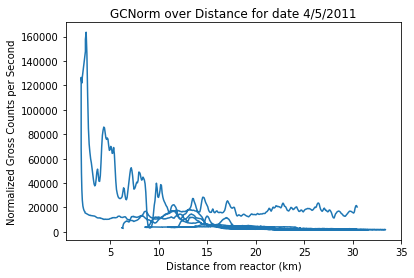

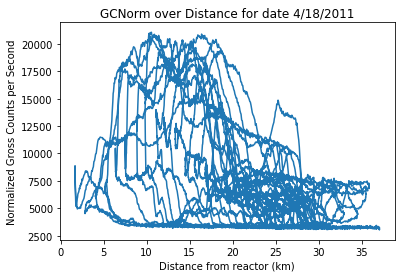

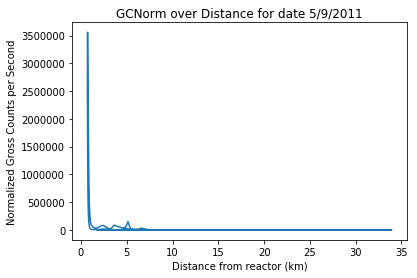

In [57]:
import numpy as np

# note that we use the numpy library, this allows us to vectorize our code. 
def haversine(lat1, lon1, lat2, lon2):
    '''
    Get distance (km) between two points on the surface of a sphere (Earth).
    ...
    
    :param lat1: the latitude value of the first point
    :param lon1: the longitude value of the first point
    :param lat2: the latitude value of the second point
    :param lon2: the longitude value of the second point
    
    :returns: distance (km) between the two points
    '''
    
    Radius_Earth_KM = 6371
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_km = Radius_Earth_KM * c
    return total_km

# get ids for all observations
ids = list(ds.records.find_with_type("obs", ids_only=True))

# convert to pandas data frame
df = get_pd(ds,ids)

# making a new column using existing columns. 
reactor = [37.4227,141.0327 ]
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])


# Now that we have the distance, we want to plot by date.
dates = df['date'].unique()
for date in dates:
    plot_df = df[df['date']==date]
    x = plot_df['distance']
    y = plot_df['gcnorm']
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y)
    ax.set_xlabel("Distance from reactor (km)")
    ax.set_ylabel("Normalized Gross Counts per Second")
    ax.set_title('GCNorm over Distance for date {}'.format(date))


### 3D Plots with Pandas
Here, we will demonstrate how to produce a 3D plot using data from a DataFrame and matplot lib. Note that this plot interpolates the surface by creating triangles with adjacent points. 

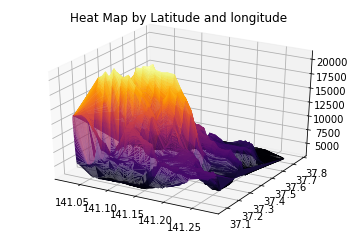

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# get ids for a single date
ids = ds.records.find_with_data(date='4/18/2011')


# convert to pandas data frame
df = get_pd(ds,ids)

fig = plt.figure()
ax = plt.axes(projection='3d')


x = df['longitude']
y = df['latitude']
z = df['gcnorm']
_ = ax.plot_trisurf(x, y, z, cmap='inferno', edgecolor='none')
_ = ax.set_title('Heat Map by Latitude and longitude')

### Combining Concepts
By combining concepts from the last two cells, we can create a heat map that includes both distance from the reactor and altitude. 

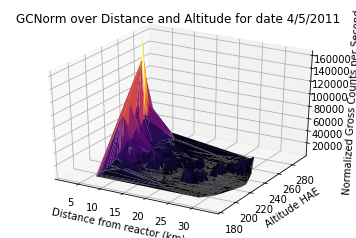

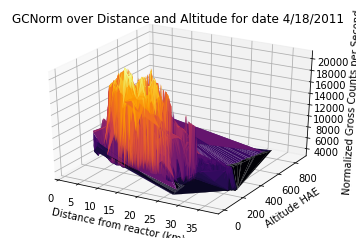

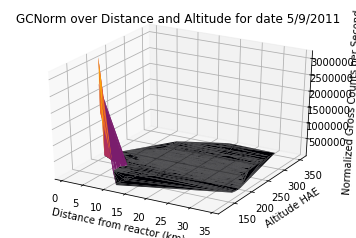

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# get ids for all observations
ids = list(ds.records.find_with_type("obs", ids_only=True))

# we will use a random subset of records, no need to load them all for these examples
k = 15000
ids = random.sample(ids, k)

# convert to pandas data frame
df = get_pd(ds,ids)

# making a new column using existing columns. 
reactor = [37.4227,141.0327 ]

#haversine function declared above
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])


# Now that we have the distance, we want to plot by date.
dates = df['date'].unique()
for date in dates:
    plot_df = df[df['date']==date]
    x = plot_df['distance']
    z = plot_df['gcnorm']
    y = plot_df['alt_hae']
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    _ = ax.plot_trisurf(x, y, z, cmap='inferno', edgecolor='none')
    _ = ax.set_xlabel("Distance from reactor (km)")
    _ = ax.set_ylabel("Altitude HAE")
    _ = ax.set_zlabel("Normalized Gross Counts per Second")
    _ = ax.set_title('GCNorm over Distance and Altitude for date {}'.format(date))


## Example with Outlier Detection and Removal
A basic example of outlier detection and removal using the zscore method. 

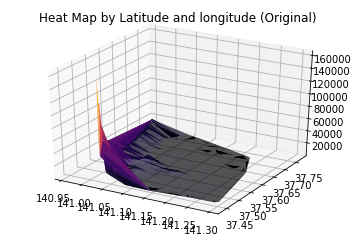

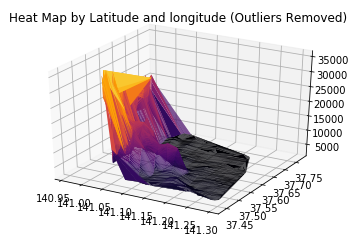

In [31]:
from scipy.stats import zscore
import numpy as np

def remove_outliers(features, target):
    '''
    Uses Z-score to identify outliers.
    ...
    :param features: DataFrame with only numeric values
    :param target: DataFrame with remaining columns
    
    :returns: Dataframe without outliers
    '''
    
    z = np.abs(zscore(features))
    
    df = pd.concat([features, target], axis = 1)
    
    return df[(z <3).all(axis=1)]


# get ids for all observations
ids = list(ds.records.find_with_data(date='4/5/2011'))

# convert to pandas data frame
df = get_pd(ds,ids)
# only select numeric types as your features
features = df.select_dtypes(exclude='object')

# get non-numeric types
targets = df.select_dtypes(include='object')

new_df = remove_outliers(features, targets)

# plot results, maybe be more useful with other data sets
fig = plt.figure()
ax = plt.axes(projection='3d')

x = df['longitude']
y = df['latitude']
z = df['gcnorm']
_ = ax.plot_trisurf(x, y, z, cmap='inferno', edgecolor='none')
_ = ax.set_title('Heat Map by Latitude and longitude (Original)')

fig = plt.figure()
ax = plt.axes(projection='3d')

x = new_df['longitude']
y = new_df['latitude']
z = new_df['gcnorm']
_ = ax.plot_trisurf(x, y, z, cmap='inferno', edgecolor='none')
_ = ax.set_title('Heat Map by Latitude and longitude (Outliers Removed)')


## Example with Linear Regresion
This example shows some use with linear regression. Here, we do some feature engineering, train a model, and view the results. The goal for the model is to be able to determine gcnorm based on distance from the reactor, altitude, and days since the event. This model does not perform particularily well, but does serve as an example workflow with pandas and sklearn.

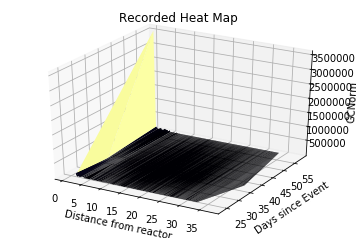

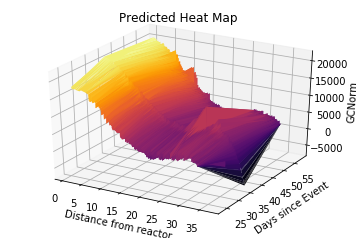

In [53]:
from sklearn.linear_model import LinearRegression

# load data from sina

# get ids for all observations
ids = list(ds.records.find_with_type("obs", ids_only=True))

# we will use a random subset of records, no need to load them all for this example
k = 5000
ids = random.sample(ids, k)

# convert to pandas data frame
df = get_pd(ds,ids)

# feature engineering

# use haversine function declared in above cells to get distance measure
reactor = [37.4227,141.0327 ]
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])

# calculate days since reactor disaster
# use a dictionary to map strings to ints, using the df.replace() method
dates = {'4/5/2011':24, '4/18/2011':37, '5/9/2011':58}
df['days_since'] = df['date'].replace(dates)

# train the model

# our 3 features are altitude, distance, days
feature_labels = ['alt_hae', 'distance', 'days_since']

# get features vector, and concatentate. x, x^2, x^3
X = df[feature_labels].values
for i in range(2,4):
    X = np.concatenate((X, X**i), axis=1)
    
# get labels    
Y = df['gcnorm'].values


# fit the regression
reg = LinearRegression().fit(X, Y)


# view the results 
zprime = reg.predict(X)

y = df['days_since']
x = df['distance']
z = df['gcnorm']

fig = plt.figure()
ax = plt.axes(projection='3d')
_ = ax.plot_trisurf(x, y, z, cmap='inferno', edgecolor='none')
_ = ax.set_title('Recorded Heat Map')
_ = ax.set_ylabel('Days since Event')
_ = ax.set_xlabel('Distance from reactor')
_ = ax.set_zlabel('GCNorm')

print('\n\n')

fig = plt.figure()
ax = plt.axes(projection='3d')
_ = ax.plot_trisurf(x, y, zprime, cmap='inferno', edgecolor='none')
_ = ax.set_title('Predicted Heat Map')
_ = ax.set_ylabel('Days since Event')
_ = ax.set_xlabel('Distance from reactor')
_ = ax.set_zlabel('GCNorm')


In [ ]:
factory.close()